In [9]:
%load_ext autoreload
%autoreload 2

Imports

In [2]:
import numpy as np
from pprint import pprint
import json
from interq_cip_qhs.process.utils import jprint
import matplotlib.pyplot as plt
import h5py
from interq_cip_qhs.process.sawing import SawingProcessData
from interq_cip_qhs.process.milling import MillingProcessData
from interq_cip_qhs.config import Config
config = Config()

Constants

In [3]:
milling_quality_data_with_ts_path = "/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/notebooks/quality_data_cylinder_bottom.csv"
container_name = "hardcore_kilby"
reader = MillingProcessData()

Function Definitions

In [4]:
def get_cip_dmd_data(part_id):
    path = reader._part_id_paths[part_id]
    part_id, acc_data, bfc_data = reader.read_raw_from_folder(path)
    process_end_ts, process_times = reader.get_processing_times(acc_data)
    acc_x = acc_data["acc_x"].to_numpy()
    time = acc_data["time"].to_numpy()
    return acc_x, time

def show_id(part_id, axs, pos, title):
    acc_x, time = get_cip_dmd_data(part_id)
    axs[pos].plot(time, acc_x)
    axs[pos].set_title(title)
    plt.ylim(-0.4, 0.4)


Show normal and anomalous part

/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:137: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, process_data])
/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:137: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, process_data])


difference first timestamp bfc_features -0.5178749561309814 on side side_1
difference last timestamp bfc_features -23.82388710975647 on side side_1
difference first timestamp bfc_features -0.00873708724975586 on side side_2
difference last timestamp bfc_features -0.9793119430541992 on side side_2


/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:178: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, process_data])
/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:178: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, process_data])
/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:137: 

difference first timestamp bfc_features -0.5118980407714844 on side side_1
difference last timestamp bfc_features -24.05851697921753 on side side_1
difference first timestamp bfc_features -0.6190149784088135 on side side_2
difference last timestamp bfc_features -0.5996899604797363 on side side_2


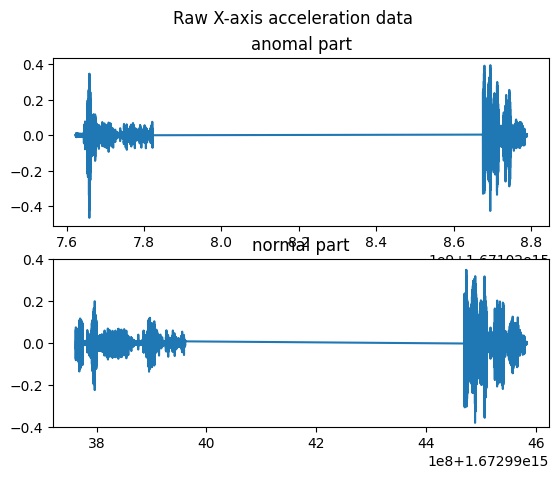

In [5]:
fig, axs = plt.subplots(2)

# anomalous: 
show_id("124404", axs, 0, "anomal part")
# nonanomalous
show_id("115102", axs, 1, "normal part")
fig.suptitle("Raw X-axis acceleration data")
plt.show()

Create numpy NaN values in dedicated dataset

In [ ]:
# 126101 is not a real part number, this dataset entry was created to demonstrate missing value rule
path_to_missing = '/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/data/cip_dmd/cylinder_bottom/cnc_milling_machine/process_data/126101_04_24_2023_12_23_54/backside_external_sensor_signals.h5'
with h5py.File(path_to_missing, 'r') as hf:
    acc_x = hf["data"][:,1]

idxs = [i for i in range(len(acc_x))]
n_missing_values = 847
acc_x_with_missing = acc_x.copy()
miss_idxs = np.random.choice(idxs, n_missing_values)
for idx in miss_idxs:
    acc_x_with_missing[idx] = np.nan

with h5py.File(path_to_missing, 'r+') as hf:
    hf["data"][:,1] = acc_x_with_missing

Get data quality hallmark of process data with missing values

In [6]:
path_data = "/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/notebooks/"
reader = MillingProcessData()
a = reader.get_raw_data_QH_id("126101", container_name = container_name)
jprint(a)

/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:137: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, process_data])
/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:137: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, process_data])
/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:178: 

difference first timestamp bfc_features -0.9174079895019531 on side side_1
difference last timestamp bfc_features -23.920352935791016 on side side_1
difference first timestamp bfc_features -0.7955598831176758 on side side_2
difference last timestamp bfc_features -0.44635009765625 on side side_2


/home/mittwollen_h@PTW.Maschinenbau.TU-Darmstadt.de/interq_cip_qhs/src/interq_cip_qhs/process/milling.py:178: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, process_data])


{
    "qhd": {
        "qhd-body": {
            "batch_id": "aisudfgq",
            "end_time": "2023-04-24T10:40:57Z",
            "exceptions": {
                "exception_info": {
                    "exception_message": null,
                    "exception_traceback": null,
                    "raised_exception": false
                },
                "expectation_config": {
                    "expectation_type": "expect_column_records_unique",
                    "kwargs": {
                        "column_A": "time",
                        "column_B": "time",
                        "result_format": "BASIC"
                    },
                    "meta": {}
                },
                "meta": {},
                "result": {
                    "element_count": 780000,
                    "missing_count": 0,
                    "missing_percent": 0.0,
                    "partial_unexpected_list": [
                        [
                            "2023-04-24T